## 1. Defining the Question

### a) Specifying the Data Analysis Question

Specify the reasearch question that you'll be answering.

> i.e. Provide strategy recommendations that will lead to revenue growth.

### b) Defining the Metric for Success

The solutions to the following questions will help us answer our research question:

1. When is the best time of year to book a hotel room?
2. When is the optimal length of stay in order to get the best daily rate? 
3. How will you know if a hotel was likely to receive a disproportionately high number of special requests?

### c) Understanding the context 

As a data analyst working for Hilton International Hotels, and have been tasked to help the management decide on the best strategies that will lead to revenue growth.



### d) Recording the Experimental Design

1. Define the Research Question
2. Data Importation
3. Data Exploration
4. Data Cleaning
5. Data Preparation
6. Data Analysis (Univariate and Bivariate)

### e) Data Relevance

The dataset is appropriate to answering the research question.

## 2. Reading the Data

In [ ]:
# Load the data below

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/hotel_bookings.csv')

In [ ]:
# Checking the first 5 rows of data

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Checking the last 5 rows of data

df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# Sample 10 rows of data

df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
15157,Resort Hotel,1,244,2015,September,36,2,2,5,2,0.0,0,BB,IRL,Groups,TA/TO,0,24,0,A,A,0,No Deposit,96.0,NaN,0,Transient-Party,8.00,0,0,Canceled,2015-06-17
106198,City Hotel,0,190,2017,February,8,20,1,2,3,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,79.0,NaN,0,Transient,104.00,0,0,Check-Out,2017-02-23
12652,Resort Hotel,1,156,2017,July,28,10,1,3,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,120.00,0,1,Canceled,2017-06-29
118679,City Hotel,0,96,2017,August,34,20,2,2,1,0.0,0,BB,ESP,Offline TA/TO,TA/TO,0,0,0,A,A,2,No Deposit,98.0,NaN,0,Transient-Party,115.00,0,0,Check-Out,2017-08-24
10650,Resort Hotel,1,105,2017,March,12,25,2,4,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,56.00,0,2,Canceled,2017-02-08
118651,City Hotel,0,189,2017,August,35,27,2,0,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,1,A,A,1,No Deposit,9.0,NaN,0,Transient-Party,119.00,0,3,Check-Out,2017-08-29
9515,Resort Hotel,1,3,2016,December,50,5,1,2,2,0.0,0,Undefined,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,134.0,NaN,0,Transient-Party,42.00,0,0,Canceled,2016-12-02
92339,City Hotel,0,167,2016,July,28,3,2,0,2,0.0,0,BB,FIN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,11.0,NaN,0,Transient,77.03,0,0,Check-Out,2016-07-05
5095,Resort Hotel,0,200,2016,April,17,17,2,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,58.20,1,1,Check-Out,2016-04-21
79469,City Hotel,1,1,2015,October,44,28,0,3,2,0.0,0,HB,PRT,Groups,TA/TO,1,1,0,A,A,0,No Deposit,37.0,NaN,0,Transient-Party,111.00,0,0,Canceled,2015-10-27


In [ ]:
# Checking number of rows and columns

df.shape

(119390, 32)

In [ ]:
# Checking datatypes

df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Record your observations below:

*   Observation 1:
There are 32 Variables, features, columns and 119390 records, observations.

*   Observation 2: 
The values within these variables are of the following data types: int, object and float



## 3. External Data Source Validation

The data is originally from the article Hotel Booking Demand Datasets, by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

## 4. Data Preparation

### Performing Data Cleaning

In [ ]:
# Checking datatypes and missing entries of all the variables

df.dtypes

df.isnull().sum()

df.isna().mean().sort_values(ascending=False).round(2) * 100

country                           0.0
reservation_status_date           0.0
market_segment                    0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
distribution_channel              0.0
reservation_status                0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_typ

We observe the following from our dataset:

*   Observation 1:
The company variable has 94.0% of missing values.

*   Observation 2:
The agent variable has 14.0% of missing values.



In [ ]:
# Checking how many duplicate rows are there in the data

df_duplicates = df[df.duplicated()]
df_duplicates


print(' The number of duplicated rows are:' , sum(df.duplicated()))


 The number of duplicated rows are: 31987


We choose to keep the duplicates because we don't have a unique identifier to actually proof that we have duplicates.

In [ ]:
# Checking if any of the columns are all null

df.isnull().all().any()

False

In [ ]:
# Checking if any of the rows are all null

df.isnull().all(axis=1).any()


False

We observe the following from our dataset:

*   Observation 1:
We choose to keep the duplicates (31994) because we don't have a unique identifier to actually proof that we have duplicates.

*   Observation 2: 
No columns are completely null

*   Observation 3: 
None of the records are completely null



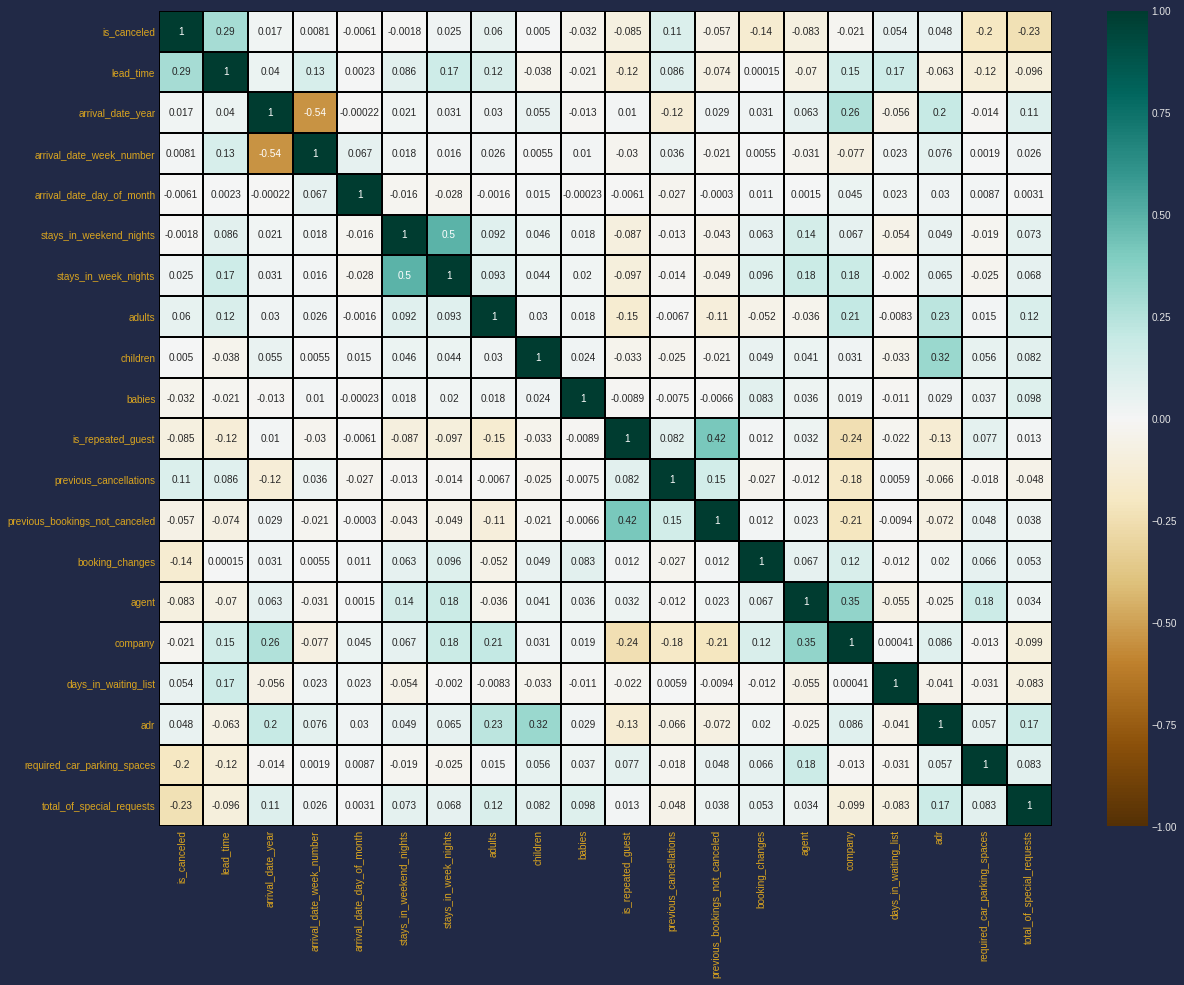

In [ ]:
# Checking the correlation of the features through the use of 
# visualizations the correlation using heatmap

df_corr = df.corr()
df_corr

# Adding the figure size so that we get a bigger image
plt.figure(figsize=(20,15))

# Lets plot the heatmap
sns.heatmap(df_corr, linewidths=1.0, cmap='BrBG', annot= True, vmin=-1, vmax=1, linecolor='black')
plt.xticks(color='goldenrod')
plt.yticks(color='goldenrod')
plt.show()


We observe the following from our dataset:

*   Observation 1:
stay_in_week_nights has a strong positive correlation of 0.5 with stays_in_weekend_nights.

*   Observation 2:
arrival_date_week_number has a weak negative correlation of -0.54 with arrival_date_year.




In [ ]:
# Dropping company column because it has alot of missing values 
# and we won't need to answer any of our questions

df.drop(columns=['company'], axis = 1, inplace=True)
df.columns

From the data variable description we see that the Distribution Channel category tells us about Booking distribution.

1. The term “TA” means “Travel Agents” 
2. The term “TO” means “Tour Operators”

This allows us to fill the missing values in the agents column with TO

In [ ]:
# We replace the mising values i.e. for TO

# The Distribution Channel variable does not conatin any missing values but we can still try the replacement

print(df.distribution_channel.unique())

df['agent'] = df['agent'].replace(np.nan, "TA/TO")

['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


In [ ]:
# We drop rows where there is no adult, baby and child as these records won't help us.

indexNames = df[(df['babies'] == 0) & (df['children'] == 0) & (df['adults'] == 0)].index
    
df.drop(indexNames, inplace = True)


In [ ]:
# We replace missing children values with rounded mean value


# Calculate the mean of the chilren variable
df_children_mean = df['children'].mean()

# Round of the calculated mean to 2 dp
df_rounded_mean = round(df_children_mean,2)
df_rounded_mean

# Add mean to missing children values
df['children'] = df['children'].fillna(df_rounded_mean)

In [ ]:
# Checking for missing values in the dataframe

df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           478
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

In [ ]:
# Converting the datatypes of the following columns from float to integer
# i.e. children, company, agent
# ---
# 
df.dtypes

# We initially dropped the Company column

# Converting Children variable data type from float64 to int64
df['children'] = df['children'].astype('int64')

# # Converting Agent variable data type from float64 to int64
# df['agent'] = df['agent'].astype('int64')

df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             


## 5. Solution Implementation

Here we investigate the questions that would help us with our recommendations.

### 5.a) Questions

0    75166
1    44224
Name: is_canceled, dtype: int64 




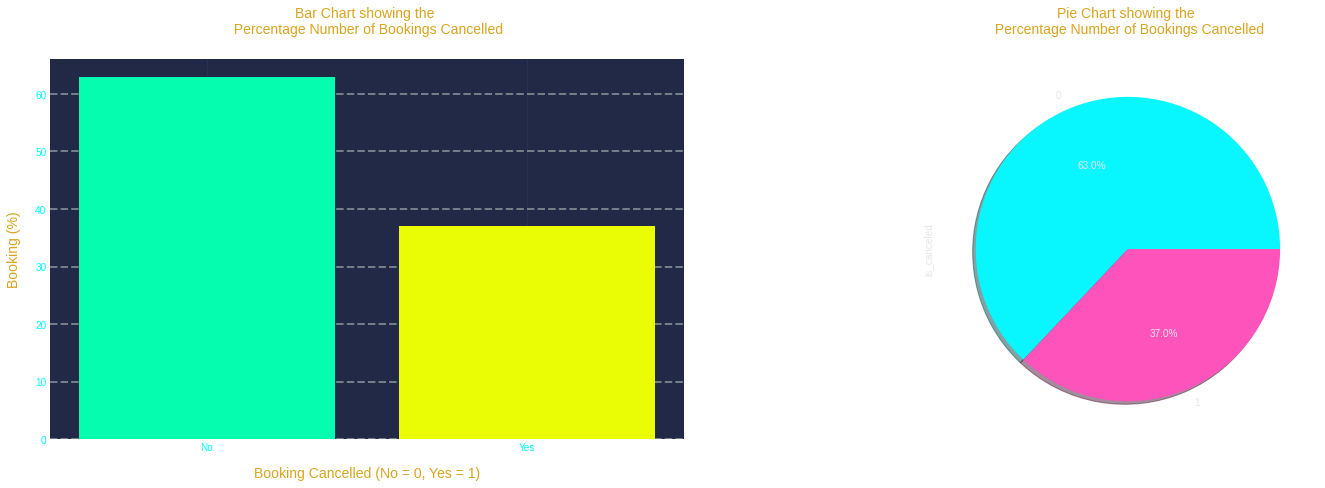

In [ ]:
# 1. How many bookings were cancelled?
# ---
# 

# First getting the data that we need 
# ---
# 
# Shows number of unique values within the Is Cancelled variable
print(df['is_canceled'].value_counts(), '\n\n')


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,7))
# Define the size of the bar chart
# plt.figure(figsize=(7,7))

# # Then plotting a bar plot 
plt.subplot(1,2,1)

x = ['No', 'Yes']
y = (df.is_canceled.value_counts()/sum(df.is_canceled.value_counts()))* 100

plt.bar(x, y, color=['#04FDAE', '#EAFD04'])
plt.xlabel('Booking Cancelled (No = 0, Yes = 1)', labelpad=14, color='goldenrod', fontsize=14)
plt.ylabel('Booking (%)', labelpad=14, color='goldenrod', fontsize=14)
plt.title("Bar Chart showing the \n Percentage Number of Bookings Cancelled", fontsize=14, y=1.05, color='goldenrod')
plt.xticks(rotation=0, color='aqua')
plt.yticks(color='aqua')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

# Plotting Pie Chart
plt.subplot(1,2,2)

df['is_canceled'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title("Pie Chart showing the \n Percentage Number of Bookings Cancelled", fontsize=14, y=1.05, color='goldenrod')
plt.show()

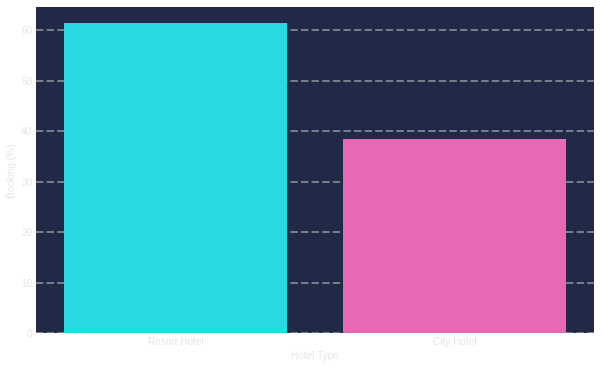

In [ ]:
# 2. What was the booking ratio between resort hotel and city hotel?
# ---
# 

# First selecting only those booking which did not get cancelled.
# ---
#
df_not_canceled = df[df['is_canceled'] == 0]

# Selecting our desired records
# ---

x = list(df_not_canceled['hotel'].unique())
y =  (df_not_canceled['hotel'].value_counts()/sum(df_not_canceled['hotel'].value_counts())) * 100

# Then plotting a bar plot of booking ratio between resort hotel and city hotel
# ---

plt.figure(figsize=(10,6))
sns.barplot(x,y, data = df)
plt.xlabel('Hotel Type')
plt.ylabel('Booking (%)')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()


[2015 2016 2017]


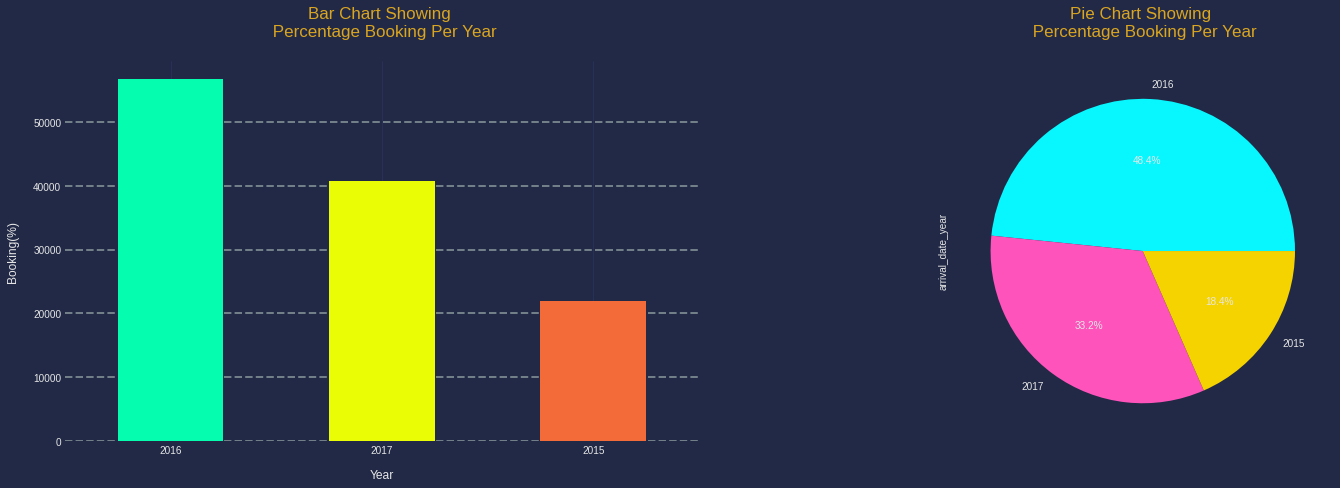

In [ ]:
# 3. What was the percentage of booking for each year?
# ---
# 

# Getting our variable of interest

print(df_not_canceled['arrival_date_year'].unique())

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,7))

plt.subplot(1,2,1)

df['arrival_date_year'].value_counts().plot(kind='bar' ,color=['#04FDAE', '#EAFD04', '#F26B38'])
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Bar Chart Showing \n Percentage Booking Per Year', y=1.05, fontsize=17, color='goldenrod')
plt.xlabel('Year', labelpad=14, fontsize=12)
plt.ylabel('Booking(%)', labelpad=14, fontsize=12)


plt.subplot(1,2,2)
df_not_canceled['arrival_date_year'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart Showing \n Percentage Booking Per Year', y=1.05, fontsize=17, color='goldenrod')

plt.show()

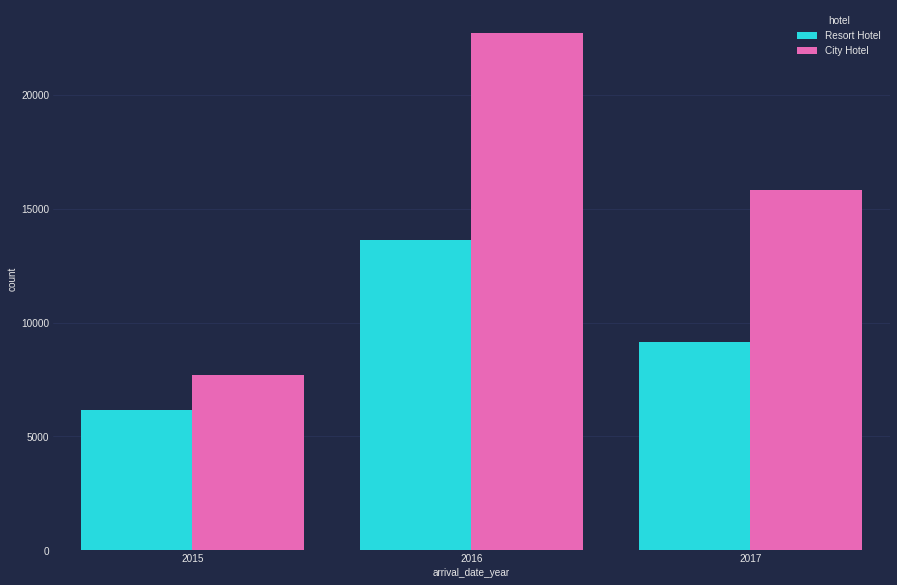

In [ ]:
# Separating the data by hotel
# ---
# 
plt.figure(figsize=(15,10))

sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled)
plt.show()

In [ ]:
!pip install mplcyberpunk

import matplotlib.pyplot as plt
import mplcyberpunk

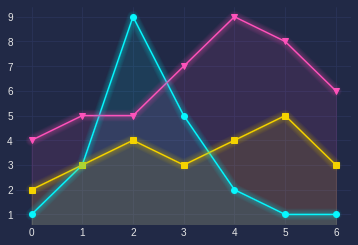

In [ ]:
plt.style.use("cyberpunk")
plt.plot([1, 3, 9, 5, 2, 1, 1], marker='o')
plt.plot([4, 5, 5, 7, 9, 8, 6], marker='v')
plt.plot([2, 3, 4, 3, 4, 5, 3], marker='s')# Add glow effects-Optional
mplcyberpunk.add_glow_effects()
plt.show()

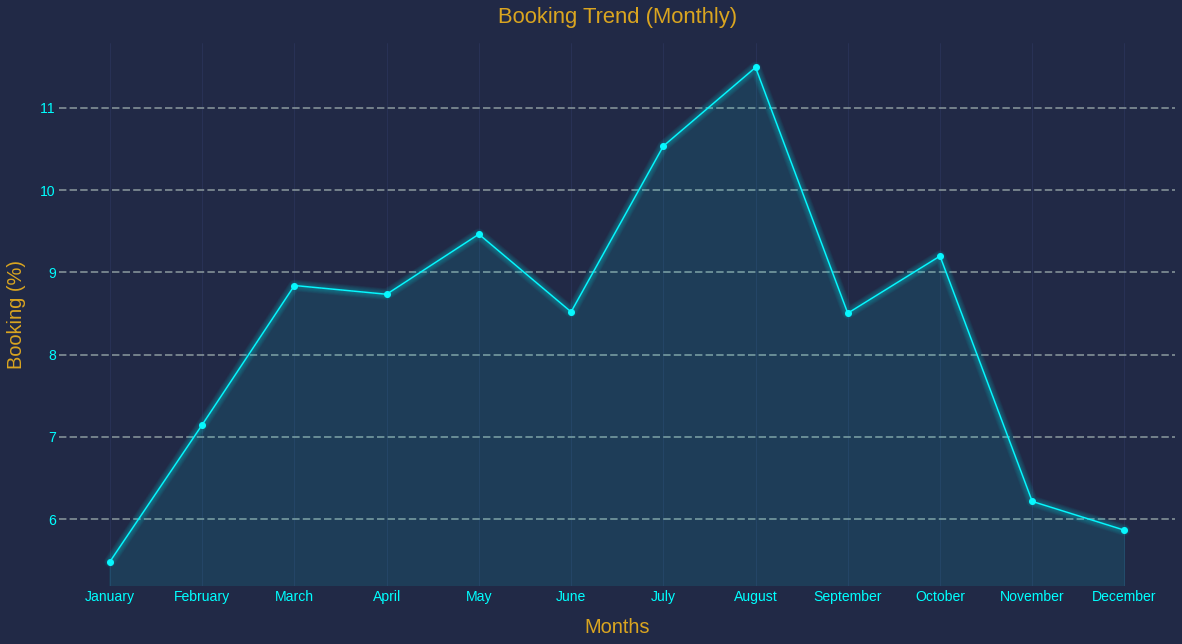

In [ ]:
# 4. Which were the most busiest months for hotels?
# ---
# 

# We would like to use our months in our x-axis so we set that
# ---
# 
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100

# Plotting our visualisation
# --- 
# 
# plt.plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))
plt.figure(figsize=(20,10))
plt.style.use("cyberpunk")
plt.plot(x, y.values, marker='o')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xlabel('Months', labelpad=14, fontsize=20, color='goldenrod')
plt.ylabel('Booking (%)', labelpad=14, fontsize=20, color='goldenrod')
plt.xticks(color='aqua', fontsize=14)
plt.yticks(color='aqua', fontsize=14)
plt.title('Booking Trend (Monthly)', y=1.025, fontsize=22, color='goldenrod')
mplcyberpunk.add_glow_effects()
plt.show()

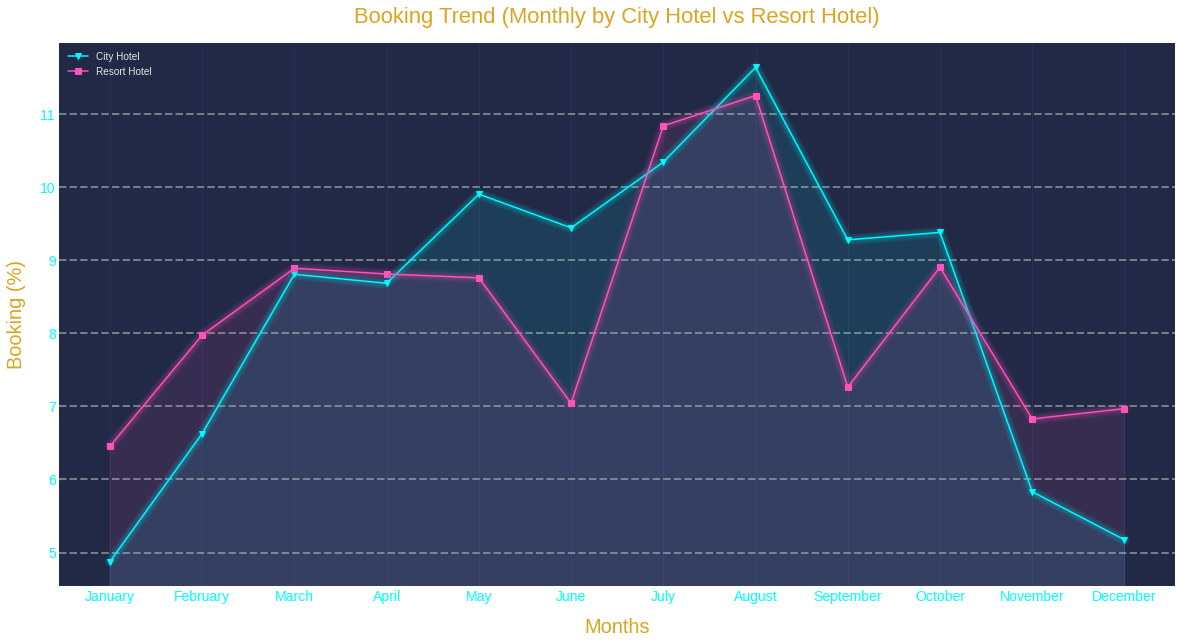

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
# Order of months
# ---
#
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


# Select only City Hotel
# ---
#
sorted_months = df_not_canceled.loc[df.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100


# Select only Resort Hotel
sorted_months = df_not_canceled.loc[df.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100

# Drawing the line plot

from google.colab import files

plt.figure(figsize=(20,10))
plt.plot(x1, y1.values, marker = 'v')
plt.plot(x2, y2.values, marker = 's')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xlabel('Months', labelpad=14, fontsize=20, color='goldenrod')
plt.ylabel('Booking (%)', labelpad=14, fontsize=20, color='goldenrod')
plt.xticks(color='aqua', fontsize=14)
plt.yticks(color='aqua', fontsize=14)
plt.title('Booking Trend (Monthly by City Hotel vs Resort Hotel)', y=1.025, fontsize=22, color='goldenrod')
mplcyberpunk.add_glow_effects()

plt.legend(["City Hotel", "Resort Hotel"], loc ="upper left") 
plt.show()


# We save our visualisation in our desired format as shown
# ---
# 
plt.savefig("booking_trend_line_plot.png", bbox_inches='tight')

# And later download the respective file
# ---
#
files.download("booking_trend_line_plot.png");

     country
PRT    48590
GBR    12129
FRA    10415 




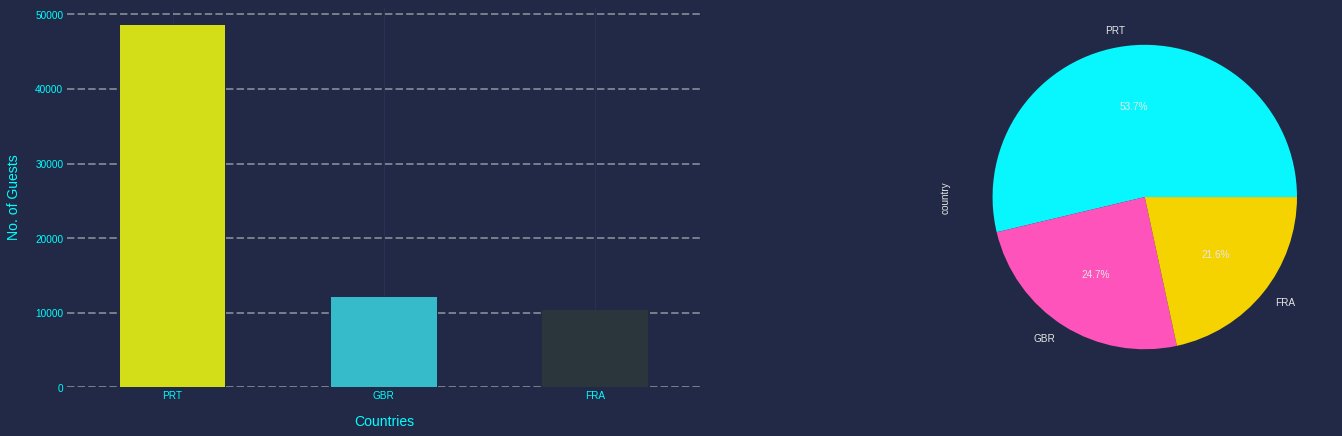


The top three countries with the most guests are Portugal, Great Britain and France


In [ ]:
# 5. From which top 3 countries did most guests come from?

print(df['country'].value_counts().nlargest(3).to_frame(),'\n\n')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,7))

plt.subplot(1,2,1)
df['country'].value_counts().nlargest(3).plot(kind='bar', color=['#D3DD18', '#35BBCA', '#2A363B', '#E8175D', '#F26B38'])
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=0, color='aqua')
plt.yticks(rotation=0, color='aqua')
plt.ylabel('No. of Guests', labelpad=14, fontsize=14, color='aqua')
plt.xlabel('Countries', labelpad=14, fontsize=14, color='aqua')


plt.subplot(1,2,2)
df_not_canceled['country'].value_counts().nlargest(3).plot.pie(autopct='%1.1f%%')

plt.show()
print('\nThe top three countries with the most guests are Portugal, Great Britain and France')

   length_of_stay  number_of_bookings
0               1               15749
1               3               15725
2               2               15480
3               4               11025
4               7                5686
5               5                5121
6               6                2322
7              10                 783
8               8                 720
9               0                 680


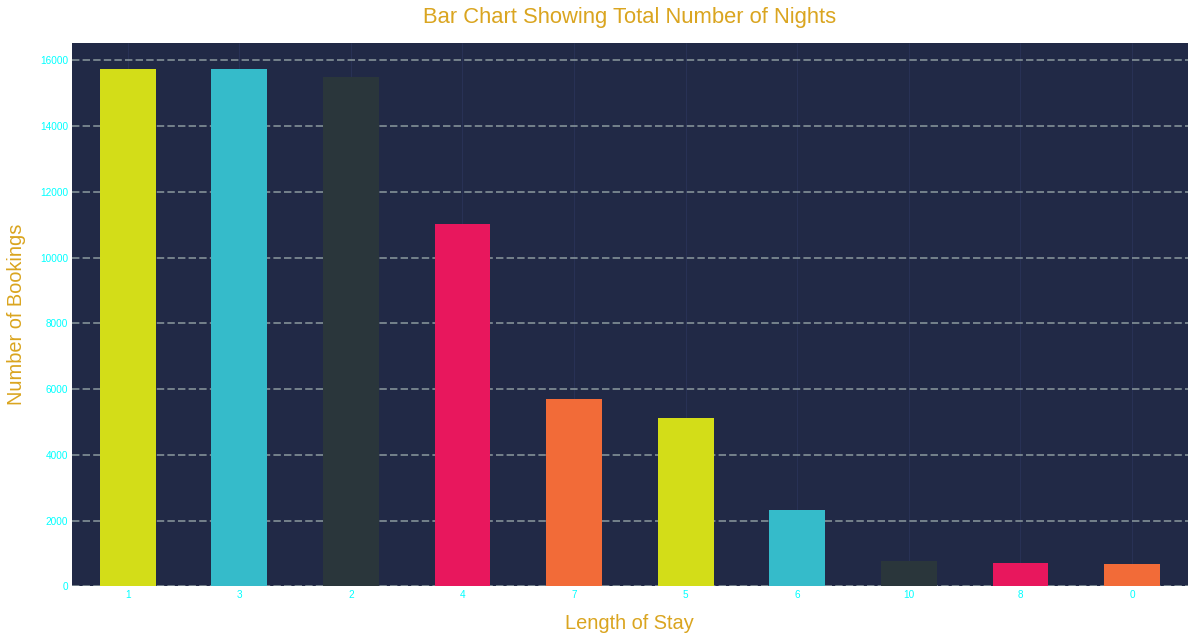

In [ ]:
# 6.a) How long do most people stay in hotels?
#   b) By city and resort? Separate the data by hotel
# ---
# 

# Calculating the total nights
# ---
# Hint: total_nights = stays_in_weekend_nights + stay_in_week_nights.
# Also, only select 10 records.
# ---
#
df_not_canceled['total_nights'] = df_not_canceled['stays_in_weekend_nights'] + df_not_canceled['stays_in_week_nights']

most_stays = df_not_canceled['total_nights'].value_counts().to_frame()
most_stays.reset_index(level=0, inplace=True)
most_stays.columns = ['length_of_stay','number_of_bookings']
print(most_stays.head(10))

plt.figure(figsize=(20,10))
df_not_canceled['total_nights'].value_counts().nlargest(10).plot(kind='bar', color=['#D3DD18', '#35BBCA', '#2A363B', '#E8175D', '#F26B38'])
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xlabel('Length of Stay', labelpad=14, fontsize=20, color='goldenrod')
plt.ylabel('Number of Bookings', labelpad=14, fontsize=20, color='goldenrod')
plt.xticks(rotation=0, color='aqua')
plt.yticks(color='aqua')
plt.title('Bar Chart Showing Total Number of Nights', y=1.025, fontsize=22, color='goldenrod')
plt.show()

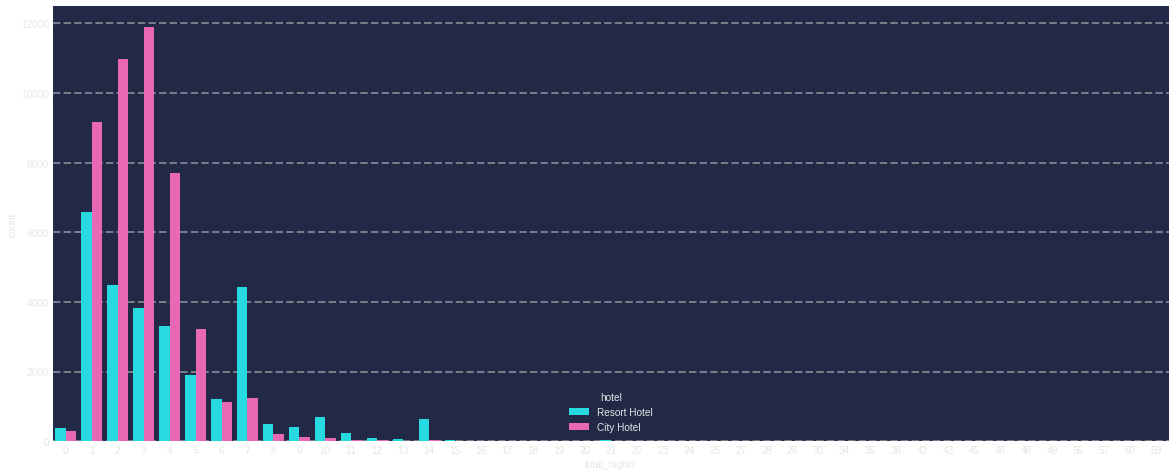

In [ ]:
# b) By city and resort? 
# Hint: Separate the data by hotel

plt.subplots(figsize=(20,8))
sns.countplot(x='total_nights', hue='hotel',  data=df_not_canceled)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

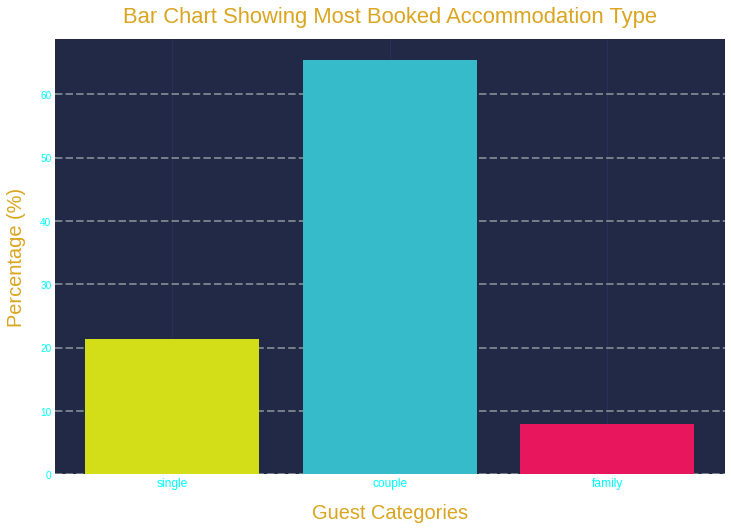

In [ ]:
# 7. Which was the most booked accommodation type (Single, Couple, Family)?

# Select Single, Couple, Multiple Adults and Family 

# Single

single   = df_not_canceled[(df_not_canceled['adults']==1) & (df_not_canceled['children']==0) & (df_not_canceled['babies']==0)]

# Couple

couple = df_not_canceled[(df_not_canceled['adults']==2) & (df_not_canceled['children']==0) & (df_not_canceled['babies']==0)]


# Family

family = df_not_canceled[(df_not_canceled['children'] > 0) | (df_not_canceled['babies'] > 0)]

family = family[(family['adults'] >= 1)]


# Then make the list of category names, and their total percentage

x = ['single', 'couple', 'family']
y = [single.shape[0]/df_not_canceled.shape[0] * 100, couple.shape[0]/df_not_canceled.shape[0] * 100,family.shape[0]/df_not_canceled.shape[0] * 100]


# Performing our plot
# --- 

plt.figure(figsize=(12,8))
plt.bar(x,y, align='center', color=['#D3DD18', '#35BBCA', '#E8175D', '#F26B38'])
plt.xlabel('Guest Categories', labelpad=14, fontsize=20, color='goldenrod')
plt.ylabel('Percentage (%)', labelpad=14, fontsize=20, color='goldenrod')
plt.xticks(rotation=0, color='aqua', fontsize=12)
plt.yticks(color='aqua')
plt.title('Bar Chart Showing Most Booked Accommodation Type', y=1.025, fontsize=22, color='goldenrod')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()


### 5.b) Recommendations

From the above analysis, below are our recommendations:

1. Both City Hotels and Resort Hotels should come up with new marketing strategies or improve on already existing ones to cleary advertise on their presence, communicate on the services they offer, deals if any in order to improve on the number of bookings.
2. We can see that booking have increased over the years and inorder to maintain this trend, the hotels can offer special deals/ rates especially during off-peak periods. This will attract more customers and in turn increase the number of bookings hnce and increase in revenue.
3. August is one of the busiest months for the Hotel industry. As mentioned earlier the hotels can opt to introduce incentives for any making abooking during the less busier months like January that has a Booking Rate of less than 5%
4. To increase on the number of guests come from different countries, the hotel management may opt to introduce referral programs where a previous guest may get discount rates on their next booking if they reffered someone else who then indeed made a booking.
5. To increase on the total number of nights spent at a hotel, management may also opt to add an extra free night for guests who book for 4 or more nights as a perk.
6. As noted most bookings are made by couples. The hotel may introduce more family friendly services and activities e.g a playground for children may increase the bookings made by a family.





## 6. Challenging your Solution

During this step, we review our solution and implement  approaches that could potentially provide a better outcome. In our case, we could propose the following question that wasn't answered in our solution because it couldn't have greatly contributed to our recommendation.

## 7. Follow up questions

During this step, you rethink and propose other ways that you can improve your solution.

### a). Did we have the right data?

Yes we had the right data and did not get to fully explore it.

### b). Do we need other data to answer our question?

From the data provided we could have a few additions as suggested below like the reasons for cancellations of the bookings which were more than the bookings made.

### c). Did we have the right question?

Additional questions we could have looked into to answer the main question are:

1.   Is there something that can be done with the cancellations? Maybe look at the relation between lead time and cancellations. Additional data on the reason for cancellation would also be useful.
2.   Is there an opportunity with repeat guests coming back what can we learn from that data. Can a survey to get more data on those that are not repeat customers to tell us why? Have they been back in the area and why didnt they stay with us. If we have a small percentage of repeat customers then we certainly have a problem we need to fix.

3.   Understanding the customer type would also have been important so as to understand our customer better.